In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open('normalization.pkl','rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3549974, 47), (3549974,), (508003, 47), (508003,))

Select the feature

Finding the best parameters

In [4]:
%%time 
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [15, 20, 25],
    "n_estimators": [60, 70, 75],
    "min_samples_split":[0,1,2],
    "min_samples_leaf":[0.2,0.5,1]
}

cf = RandomForestClassifier()
cf_cv = GridSearchCV(estimator=cf, param_grid=param_grid, scoring="f1", cv=5)
cf_cv.fit(X_train, y_train)

cf_cv.best_params_

Wall time: 17h 51min 59s


{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [6]:
rfc = RandomForestClassifier(verbose=1, random_state = 0, max_depth = 25, min_samples_leaf=1,min_samples_split=2, n_estimators=75 )

In [7]:
rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 14.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.0s finished


In [8]:
print('Matrix:', classification_report(y_test,y_pred))

Matrix:               precision    recall  f1-score   support

           0       1.00      0.99      0.99    443747
           1       0.92      1.00      0.96     64256

    accuracy                           0.99    508003
   macro avg       0.96      0.99      0.97    508003
weighted avg       0.99      0.99      0.99    508003



In [9]:
col_names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

In [10]:
fi = pd.DataFrame({ 'feature':col_names, 'importance': rfc.feature_importances_}).sort_values('importance',  ascending = False)

In [11]:
fi.head(7)

,feature,importance
0,srcip,0.193031
36,ct_state_ttl,0.143258
9,sttl,0.132478
23,dmeansz,0.083276
8,dbytes,0.055197
14,Sload,0.054356
10,dttl,0.047501


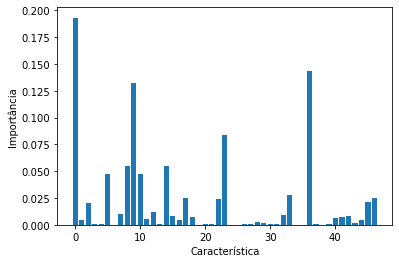

In [16]:
from matplotlib import pyplot
importance = rfc.feature_importances_
pyplot.xlabel('Característica')
pyplot.ylabel('Importância')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [13]:
X_train= X_train[:,[0,36,9,23,8,14,10]].copy()
X_test = X_test[:,[0,36,9,23,8,14,10]].copy()

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3549974, 7), (3549974,), (508003, 7), (508003,))

In [15]:
with open('dataset-nids.pkl',mode='wb') as f:
    pickle.dump([X_train, y_train, X_test, y_test],f)